# 1. Import data

In [304]:
import os
import sys
from pyprojroot import here

import pandas as pd

In [305]:
#pip list

In [306]:
# Read in the data in the previous step
df = pd.read_pickle('..\data\processed\data_clean.pkl')
len(df)

3134

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   project_title                  3134 non-null   object        
 1   project_description            3134 non-null   object        
 2   area_primary                   3129 non-null   object        
 3   discipline_primary             3130 non-null   float64       
 4   approval_date                  3134 non-null   datetime64[ns]
 5   lead_research_institution      3134 non-null   object        
 6   city                           3133 non-null   object        
 7   ontario_commitment             3134 non-null   int32         
 8   total_project_costs            3134 non-null   int32         
 9   keyword                        1077 non-null   object        
 10  year                           3134 non-null   int64         
 11  month            

# 2. Split the data to train-test

In [5]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [6]:
y1=df['label_total_project_costs'] #multiclass classifier model1
y2=df['label_ontario_commitment'] #multiclass classifier model2
y3=df['total_project_costs'] #regression model3
y4=df['ontario_commitment']  # regression model 4
y5=df['ontario_share']       #regression model 5
y6=df['two_labela_ontario_commitment']
x=df['project_title']



In [7]:
def split_data(x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)
    return (x_train,x_test,y_train,y_test)

In [8]:
x_train,x_test,y_train1,y_test1 =split_data(x,y1)
x_train,x_test,y_train2,y_test2 =split_data(x,y2)
x_train,x_test,y_train3,y_test3 =split_data(x,y3)
x_train,x_test,y_train4,y_test4 =split_data(x,y4)
x_train,x_test,y_train5,y_test5 =split_data(x,y5)
x_train,x_test,y_train6,y_test6 =split_data(x,y6)

In [9]:
len(x_train),len(x_test)

(2350, 784)

In [10]:
x_train.shape,y_train1.shape

((2350,), (2350,))

In [11]:
x_train

2855    system for flame synthesis collection and char...
1644    centre for the evaluation of technological inn...
2657    predictive immune monitoring approaches for pr...
2765                            design observation studio
518     biotechnology for wood fibre processing and en...
                              ...                        
3092    development of valueadded biodegradable multil...
1095    experimental facility for advanced manufacturi...
1130    neural and metabolic correlates of emotional p...
1294                      watershed analysis and modeling
860                    the ecological genomics laboratory
Name: project_title, Length: 2350, dtype: object

# 3.1. Make Tf-idf for training


In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Atieh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk.corpus import stopwords

In [14]:
tfidfvectorizer = TfidfVectorizer(analyzer='word',
                             lowercase=True,
                             max_df=0.9,
                             min_df=2,
                             ngram_range=(1,1),
                             stop_words='english')

In [15]:
tfidfvectorizer.fit(x_train)
tfidf_train = tfidfvectorizer.transform(x_train)

In [1]:
test="Laboratory for Forest Genomics"

In [16]:
tfidf_test  = tfidfvectorizer.transform(x_test)

In [17]:
tfidf_train.shape,tfidf_test.shape

((2350, 1605), (784, 1605))

In [18]:
countvectorizer = CountVectorizer(analyzer= 'word', stop_words='english')
count_wm=countvectorizer.fit_transform(x_train)

In [19]:
count_tokens = countvectorizer.get_feature_names()
tfidf_tokens = tfidfvectorizer.get_feature_names()

C:\Users\Atieh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [20]:
df_countvect = pd.DataFrame(data = count_wm.toarray(),columns = count_tokens)
df_tfidfvect = pd.DataFrame(data = tfidf_train.toarray(),columns = tfidf_tokens)
print("Count Vectorizer\n")
print(df_countvect)
print("\nTD-IDF Vectorizer\n")
#print(df_tfidfvect)

Count Vectorizer

      1000mhz  120c  1861  1871  18752010  1891  1d  20  2020  2d  ...  york  \
0           0     0     0     0         0     0   0   0     0   0  ...     0   
1           0     0     0     0         0     0   0   0     0   0  ...     0   
2           0     0     0     0         0     0   0   0     0   0  ...     0   
3           0     0     0     0         0     0   0   0     0   0  ...     0   
4           0     0     0     0         0     0   0   0     0   0  ...     0   
...       ...   ...   ...   ...       ...   ...  ..  ..   ...  ..  ...   ...   
2345        0     0     0     0         0     0   0   0     0   0  ...     0   
2346        0     0     0     0         0     0   0   0     0   0  ...     0   
2347        0     0     0     0         0     0   0   0     0   0  ...     0   
2348        0     0     0     0         0     0   0   0     0   0  ...     0   
2349        0     0     0     0         0     0   0   0     0   0  ...     0   

      young  youth  y

In [21]:
tfidf_train.shape, tfidf_test.shape

((2350, 1605), (784, 1605))

In [22]:
len(tfidf_tokens)

1605

In [23]:
len(set(tfidf_tokens))

1605

In [24]:
#fit change and fit the model
#transform just return the value of known model
type(tfidf_train)

scipy.sparse.csr.csr_matrix

In [25]:
tfidf_tokens[100:]

['associated',
 'assurance',
 'asthma',
 'astronomical',
 'astronomy',
 'astrophysics',
 'asymmetric',
 'atmosphere',
 'atmospheric',
 'atomic',
 'atomicallyresolved',
 'atoms',
 'attention',
 'attosecond',
 'autism',
 'automated',
 'automation',
 'automotive',
 'autonomic',
 'autonomous',
 'avian',
 'aviation',
 'awareness',
 'background',
 'bacteria',
 'bacterial',
 'bacteriophages',
 'balance',
 'barriers',
 'based',
 'basic',
 'basis',
 'beamline',
 'behavior',
 'behavioral',
 'behaviors',
 'behaviour',
 'behavioural',
 'benefit',
 'best',
 'beta',
 'beverage',
 'big',
 'bilingual',
 'bioactive',
 'bioanalytical',
 'bioarchaeology',
 'biochemical',
 'biochemistry',
 'biodiversity',
 'bioengineering',
 'biofilm',
 'biofuel',
 'biogeochemical',
 'biogeochemistry',
 'bioimaging',
 'bioinformatics',
 'biological',
 'biology',
 'biomarker',
 'biomarkers',
 'biomass',
 'biomaterial',
 'biomaterials',
 'biomatrix',
 'biomechanical',
 'biomechanics',
 'biomedical',
 'biomedicine',
 'biomim

In [26]:
tfidf_train.nonzero()[1] #Return the indices of the elements that are non-zero.

array([1446,  993,  278, ...,  811,  628,  446], dtype=int32)

In [27]:
tfidf_train.nonzero()

(array([   0,    0,    0, ..., 2349, 2349, 2349], dtype=int32),
 array([1446,  993,  278, ...,  811,  628,  446], dtype=int32))

In [28]:
import numpy as np
a=np.array([[3,0,4],[4,7,0]])
a, a.nonzero()

(array([[3, 0, 4],
        [4, 7, 0]]),
 (array([0, 0, 1, 1], dtype=int64), array([0, 2, 0, 1], dtype=int64)))

In [29]:
a.nonzero()[1]

array([0, 2, 0, 1], dtype=int64)

In [30]:
tfidf_train.shape

(2350, 1605)

In [31]:
#extract the words for with the tf-idf of higher than 0.7 for train set.
m=0
d=[]
for col in tfidf_train.nonzero()[1]:
    if tfidf_train[tfidf_train.nonzero()[0][m],col] > 0.7:
        #print (words[col], '-', tfidf_train[tfidf_train.nonzero()[0][m],col])
        d.append((tfidf_tokens[col],tfidf_train[tfidf_train.nonzero()[0][m],col]))
        m=m+1
    else:
        m=m+1
df=pd.DataFrame(d, columns=('tfidf_tokens', 'tf-idf'))
df.sort_values(by=['tf-idf'],ascending=False)    

,tfidf_tokens,tf-idf
119,modulation,1.000000
31,attosecond,1.000000
328,infrastructure,1.000000
187,array,1.000000
267,computing,1.000000
...,...,...
330,learning,0.701984
308,adolescent,0.701680
13,leading,0.700922
136,public,0.700793


In [32]:
print(tfidf_train) 

  (0, 1446)	0.43193348220168404
  (0, 993)	0.5726629431746175
  (0, 278)	0.5905272263925467
  (0, 244)	0.36982186976548354
  (1, 1457)	0.6494640308231909
  (1, 750)	0.44626073888543205
  (1, 520)	0.5024698527821166
  (1, 233)	0.35576940936713425
  (2, 1165)	0.4973506648696112
  (2, 1163)	0.4506148851099638
  (2, 959)	0.37378798426811904
  (2, 717)	0.3824072104070653
  (2, 206)	0.31704491476442354
  (2, 80)	0.40387910535031635
  (3, 1417)	0.6574013625789735
  (3, 1045)	0.5956257031390934
  (3, 384)	0.4615771552399117
  (4, 1181)	0.4272021044641115
  (4, 567)	0.5989051065676185
  (4, 493)	0.4025799688062384
  (4, 179)	0.544738840165296
  (5, 1266)	0.2419272974625589
  (5, 950)	0.5289820811452202
  (5, 550)	0.290502405770976
  (5, 277)	0.5014298393301082
  :	:
  (2345, 1151)	0.5479599649112801
  (2345, 394)	0.31890497346203267
  (2345, 77)	0.43460807005112356
  (2346, 1450)	0.3162015309808109
  (2346, 1291)	0.5282355349125356
  (2346, 1266)	0.22894517642333365
  (2346, 867)	0.455047743879

In [33]:
len(list(tfidfvectorizer.vocabulary_.keys())),len(set(list(tfidfvectorizer.vocabulary_.keys())))

(1605, 1605)

In [34]:
tfidf_train[1124,93]

0.0

In [35]:
len(df['tfidf_tokens'].unique())

288

In [36]:
df['tfidf_tokens'].duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
339     True
340     True
341     True
342     True
343    False
Name: tfidf_tokens, Length: 344, dtype: bool

In [37]:
df.loc[df.duplicated(), :]

,tfidf_tokens,tf-idf
47,laboratory,1.000000
91,tetherless,0.776121
112,research,0.744280
113,lab,1.000000
185,infrastructure,0.777126
213,bioorganic,0.743031
217,facility,0.768427
239,lab,1.000000
263,laboratory,1.000000
281,laboratory,1.000000


In [38]:
#extract the words for with the tf-idf of higher than 0.5 for test set.
m=0
d=[]
for col in tfidf_test.nonzero()[1]:
    if tfidf_test[tfidf_train.nonzero()[0][m],col] > 0.5:
        #print (words[col], '-', tfidf_test[tfidf_train.nonzero()[0][m],col])
        d.append((tfidf_tokens[col],tfidf_test[tfidf_train.nonzero()[0][m],col]))
        m=m+1
    else:
        m=m+1
df=pd.DataFrame(d, columns=('tfidf_tokens', 'tf-idf'))
df.sort_values(by=['tf-idf'],ascending=False) 

,tfidf_tokens,tf-idf
19,canadian,0.864165
17,infrastructure,0.777126
18,systems,0.695759
14,design,0.659967
15,smart,0.644996
8,degeneration,0.643573
9,resources,0.630851
7,joint,0.585367
11,nutrition,0.580851
13,integrated,0.566357


# 3.2 Make word2vec for training 

 here I tokenized the words in project title

In [165]:
import gensim

In [166]:
len(x_train),len(x_test) 

(2350, 784)

In [167]:
text_train=x_train.apply(gensim.utils.simple_preprocess)

In [168]:
text_test=x_test.apply(gensim.utils.simple_preprocess)

In [169]:
text_train[2855]

['system',
 'for',
 'flame',
 'synthesis',
 'collection',
 'and',
 'of',
 'customized',
 'nanoparticles']

Train the word2vec model 
train the model for project title using window size of 3 i.e. 3 words before the present word and 3 words ahead. A sentence with at least 2 words should be considered, configure this using min_count parameter. 

In [170]:
model_word2vec = gensim.models.Word2Vec(
    window=10,
    min_count=2,
    workers=4
)

Build a Vocabulary

In [171]:
model_word2vec.build_vocab(text_train, progress_per=1000)

Train the word2vec model

In [172]:
model_word2vec.train(text_train, total_examples=model_word2vec.corpus_count,epochs=model_word2vec.epochs)

(63666, 102410)

In [173]:
model_word2vec.train(text_test, total_examples=model_word2vec.corpus_count,epochs=model_word2vec.epochs)

(20160, 35980)

In [48]:
#model_word2vec.wv['density']

In [49]:
#model_word2vec.wv.index_to_key

In [174]:
words = set(model_word2vec.wv.index_to_key)

In [302]:
x_vect_train = np.array([np.array([model_word2vec.wv[i] for i in ls if i in words])for ls in text_train])

In [303]:
x_vect_train[0]

[array([-0.4328536 ,  0.14566544,  0.1632427 ,  0.1371196 , -0.05955375,
        -0.67971843,  0.27491936,  1.0803272 , -0.39824763, -0.19305211,
        -0.13404597, -0.7516915 , -0.1607484 ,  0.33549303,  0.12834671,
        -0.4304887 ,  0.30254617, -0.29022077, -0.13709815, -1.069185  ,
         0.30062395,  0.08138288,  0.37911004, -0.22613081, -0.08503637,
        -0.23438168, -0.23490807, -0.30170035, -0.49263114,  0.16614257,
         0.6076865 ,  0.00822454,  0.02432837, -0.50049615, -0.11744879,
         0.3874678 ,  0.09770868, -0.50835574, -0.39606258, -0.6319563 ,
        -0.06847249, -0.36838615, -0.34242505,  0.01990872,  0.5223713 ,
        -0.01516064, -0.29031232, -0.04962498,  0.32908988,  0.31539628,
         0.2901256 , -0.32575905, -0.33141315, -0.05262009, -0.5451755 ,
         0.16057727,  0.08284478, -0.12148523, -0.7372027 ,  0.16031158,
         0.04469683,  0.16069691, -0.04621087, -0.11292655, -0.65878147,
         0.43145043, -0.00969617,  0.46278077, -0.6

In [176]:
x_vect_test = np.array([np.array([model_word2vec.wv[i] for i in ls if i in words])for ls in text_test])

C:\Users\Atieh\AppData\Local\Temp\ipykernel_3252\754669392.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_vect_test = np.array([np.array([model_word2vec.wv[i] for i in ls if i in words])for ls in text_test])


In [177]:
len(x_vect_train),len(text_train)

(2350, 2350)

In [178]:
len(x_vect_test),len(text_test)

(784, 784)

In [179]:
text_train[0:1]

2855    [system, for, flame, synthesis, collection, an...
Name: project_title, dtype: object

In [180]:
len(model_word2vec.wv['system'])

100

In [181]:
model_word2vec.wv['system']

array([-0.4328536 ,  0.14566544,  0.1632427 ,  0.1371196 , -0.05955375,
       -0.67971843,  0.27491936,  1.0803272 , -0.39824763, -0.19305211,
       -0.13404597, -0.7516915 , -0.1607484 ,  0.33549303,  0.12834671,
       -0.4304887 ,  0.30254617, -0.29022077, -0.13709815, -1.069185  ,
        0.30062395,  0.08138288,  0.37911004, -0.22613081, -0.08503637,
       -0.23438168, -0.23490807, -0.30170035, -0.49263114,  0.16614257,
        0.6076865 ,  0.00822454,  0.02432837, -0.50049615, -0.11744879,
        0.3874678 ,  0.09770868, -0.50835574, -0.39606258, -0.6319563 ,
       -0.06847249, -0.36838615, -0.34242505,  0.01990872,  0.5223713 ,
       -0.01516064, -0.29031232, -0.04962498,  0.32908988,  0.31539628,
        0.2901256 , -0.32575905, -0.33141315, -0.05262009, -0.5451755 ,
        0.16057727,  0.08284478, -0.12148523, -0.7372027 ,  0.16031158,
        0.04469683,  0.16069691, -0.04621087, -0.11292655, -0.65878147,
        0.43145043, -0.00969617,  0.46278077, -0.6596057 ,  0.44

In [182]:
x_vect_train[0][0]

array([-0.4328536 ,  0.14566544,  0.1632427 ,  0.1371196 , -0.05955375,
       -0.67971843,  0.27491936,  1.0803272 , -0.39824763, -0.19305211,
       -0.13404597, -0.7516915 , -0.1607484 ,  0.33549303,  0.12834671,
       -0.4304887 ,  0.30254617, -0.29022077, -0.13709815, -1.069185  ,
        0.30062395,  0.08138288,  0.37911004, -0.22613081, -0.08503637,
       -0.23438168, -0.23490807, -0.30170035, -0.49263114,  0.16614257,
        0.6076865 ,  0.00822454,  0.02432837, -0.50049615, -0.11744879,
        0.3874678 ,  0.09770868, -0.50835574, -0.39606258, -0.6319563 ,
       -0.06847249, -0.36838615, -0.34242505,  0.01990872,  0.5223713 ,
       -0.01516064, -0.29031232, -0.04962498,  0.32908988,  0.31539628,
        0.2901256 , -0.32575905, -0.33141315, -0.05262009, -0.5451755 ,
        0.16057727,  0.08284478, -0.12148523, -0.7372027 ,  0.16031158,
        0.04469683,  0.16069691, -0.04621087, -0.11292655, -0.65878147,
        0.43145043, -0.00969617,  0.46278077, -0.6596057 ,  0.44

In [183]:
# Compute sentence vectors by averaging the word vectors for the words contained in the sentence
x_vect_avg_train = []
for v in x_vect_train:
    if v.size:
        x_vect_avg_train.append(v.mean(axis=0))
    else:
        x_vect_avg_train.append(np.zeros(100, dtype=float))
        

In [184]:
# Compute sentence vectors by averaging the word vectors for the words contained in the sentence
x_vect_avg_test = []
for v in x_vect_test:
    if v.size:
        x_vect_avg_test.append(v.mean(axis=0))
    else:
        x_vect_avg_test.append(np.zeros(100, dtype=float))

In [185]:
x_vect_train.size,x_vect_test.size

(2350, 784)

In [186]:
# Are our sentence vector lengths consistent?
for i, v in enumerate(x_vect_avg_train):
    print(len(x.iloc[i]), len(v))

109 100
98 100
30 100
30 100
145 100
193 100
57 100
36 100
31 100
68 100
67 100
86 100
49 100
47 100
49 100
98 100
90 100
186 100
76 100
97 100
125 100
75 100
50 100
50 100
75 100
62 100
43 100
107 100
29 100
42 100
71 100
80 100
120 100
56 100
67 100
31 100
95 100
63 100
64 100
79 100
40 100
78 100
72 100
44 100
72 100
69 100
125 100
97 100
35 100
40 100
22 100
84 100
106 100
74 100
60 100
40 100
89 100
81 100
64 100
40 100
62 100
64 100
77 100
73 100
74 100
144 100
97 100
118 100
70 100
77 100
127 100
130 100
74 100
106 100
59 100
46 100
123 100
88 100
80 100
72 100
120 100
43 100
70 100
60 100
58 100
78 100
150 100
41 100
83 100
27 100
30 100
52 100
67 100
71 100
46 100
112 100
68 100
73 100
52 100
88 100
88 100
23 100
102 100
44 100
86 100
31 100
84 100
34 100
61 100
46 100
72 100
90 100
50 100
53 100
111 100
88 100
45 100
31 100
100 100
108 100
50 100
78 100
52 100
59 100
40 100
55 100
59 100
42 100
195 100
52 100
72 100
63 100
66 100
94 100
63 100
28 100
113 100
116 100
128 100
4

55 100
88 100
116 100
91 100
50 100
48 100
47 100
56 100
94 100
90 100
78 100
106 100
70 100
40 100
142 100
54 100
58 100
31 100
65 100
98 100
93 100
44 100
82 100
100 100
49 100
24 100
50 100
89 100
150 100
128 100
42 100
67 100
70 100
45 100
119 100
45 100
34 100
80 100
117 100
58 100
49 100
147 100
94 100
50 100
58 100
137 100
40 100
69 100
74 100
40 100
53 100
107 100
86 100
52 100
29 100
31 100
123 100
55 100
138 100
33 100
101 100
31 100
144 100
91 100
31 100
63 100
38 100
74 100
67 100
60 100
83 100
18 100
48 100
121 100
43 100
113 100
71 100
44 100
101 100
97 100
85 100
122 100
59 100
75 100
23 100
77 100
29 100
92 100
82 100
47 100
56 100
56 100
60 100
48 100
69 100
57 100
83 100
67 100
49 100
50 100
107 100
81 100
36 100
60 100
104 100
70 100
88 100
50 100
62 100
101 100
48 100
101 100
75 100
48 100
42 100
39 100
94 100
102 100
65 100
64 100
89 100
100 100
47 100
82 100
72 100
88 100
115 100
68 100
128 100
41 100
62 100
47 100
60 100
81 100
104 100
63 100
39 100
90 100
65 100

# 4. Model

# 4.1 Multiclass classification on tf-idf data

# 4.1.1 Logistic Regression

In [63]:
tfidf_train.shape,tfidf_test.shape

((2350, 1605), (784, 1605))

In [149]:
type(tfidf_train),type(y_train1)

(scipy.sparse.csr.csr_matrix, pandas.core.series.Series)

In [65]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(tfidf_train,y_train1)

LogisticRegression(random_state=42)

In [66]:
tfidf_test.shape,tfidf_train.shape

((784, 1605), (2350, 1605))

In [67]:
y_test1.shape,y_train1.shape

((784,), (2350,))

In [68]:
model.score(tfidf_train,y_train1)

0.7536170212765958

In [69]:
model.score(tfidf_test,y_test1)

0.35331632653061223

In [70]:
y_pred=model.predict(tfidf_test)

In [71]:
type(y_pred),type(y_test1)

(numpy.ndarray, pandas.core.series.Series)

In [72]:
y_test1.value_counts()

1    210
0    196
3    194
2    184
Name: label_total_project_costs, dtype: int64

In [73]:
pd.Series(y_pred).value_counts()

0    205
3    203
2    195
1    181
dtype: int64

In [74]:
y_preds=pd.Series(y_pred)

In [75]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test1, y_preds))

[[74 50 44 28]
 [61 54 47 48]
 [38 44 62 40]
 [32 33 42 87]]


In [76]:
#Import Seaborn
#import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set(font_scale=1.5) # Increase font size

#def plot_conf_mat(y_test, y_preds):
  #  """
  #  Plots a confusion matrix using Seaborn's heatmap().
  #  """
  #  fig, ax = plt.subplots(figsize=(3, 3))
  #  ax = sns.heatmap(confusion_matrix(y_test, y_preds),
    #                 annot=True, # Annotate the boxes
   #                  cbar=False)
   # plt.xlabel("true label")
    #plt.ylabel("predicted label")
    
#plot_conf_mat(y_test1, y_preds)

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_preds))

              precision    recall  f1-score   support

           0       0.36      0.38      0.37       196
           1       0.30      0.26      0.28       210
           2       0.32      0.34      0.33       184
           3       0.43      0.45      0.44       194

    accuracy                           0.35       784
   macro avg       0.35      0.36      0.35       784
weighted avg       0.35      0.35      0.35       784



In [78]:
# Create a hyperparameter grid for LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
np.random.seed(42)
grid_model1= {"C": np.logspace(-4, 4, 20)}
model1 = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=grid_model1)

In [79]:
model1.fit(tfidf_train,y_train1)

C:\Users\Atieh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Atieh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\Atieh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Atieh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])})

In [80]:
model1.best_params_

{'C': 0.23357214690901212}

In [81]:
model1.score(tfidf_train,y_train1)

0.6485106382978724

In [82]:
model1.score(tfidf_test,y_test1)

0.35586734693877553

# 4.1.2  Random Forest

In [283]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_model = rf.fit(tfidf_train, y_train1.values.ravel())

In [284]:
rf_model.score(tfidf_train, y_train1)

0.9927659574468085

In [285]:
rf_model.score(tfidf_test, y_test1)

0.3252551020408163

In [286]:
np.random.seed(42)
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}
model1 = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid)

In [287]:
model1.fit(tfidf_train, y_train1)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])})

In [288]:
model1.best_params_

{'n_estimators': 310,
 'min_samples_split': 12,
 'min_samples_leaf': 5,
 'max_depth': None}

In [289]:
model1.score(tfidf_train, y_train1)

0.6246808510638298

In [290]:
model1.score(tfidf_test, y_test1)

0.3252551020408163

In [295]:
tfidf_train.size, tfidf_train.shape

(12889, (2350, 1605))

In [296]:
tfidf_train

<2350x1605 sparse matrix of type '<class 'numpy.float64'>'
	with 12889 stored elements in Compressed Sparse Row format>

# 4.2 Multiclass classifier one vs Rest on tf_idf data

In [83]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

In [84]:
clf = OneVsRestClassifier(LinearSVC())
clf.fit(tfidf_train,y_train1)
clf.score(tfidf_test,y_test1)

0.33035714285714285

In [85]:
y_preds1=clf.predict(tfidf_test)
print(classification_report(y_test1, y_preds1))

              precision    recall  f1-score   support

           0       0.36      0.35      0.36       196
           1       0.25      0.22      0.24       210
           2       0.28      0.31      0.30       184
           3       0.42      0.44      0.43       194

    accuracy                           0.33       784
   macro avg       0.33      0.33      0.33       784
weighted avg       0.33      0.33      0.33       784



In [86]:
clf = OneVsRestClassifier(LinearSVC())
clf.fit(tfidf_train,y_train2)
clf.score(tfidf_test,y_test2)

0.34183673469387754

In [87]:
clf.score(tfidf_train,y_train2)

0.8740425531914894

In [88]:
y_preds2=clf.predict(tfidf_test)
print(classification_report(y_test2, y_preds2))

              precision    recall  f1-score   support

           0       0.39      0.40      0.40       230
           1       0.26      0.23      0.25       181
           2       0.30      0.29      0.29       190
           3       0.39      0.43      0.41       183

    accuracy                           0.34       784
   macro avg       0.33      0.34      0.34       784
weighted avg       0.34      0.34      0.34       784



In [89]:
np.random.seed(42)
grid_model2= {"C": np.logspace(-4, 4, 20)}
model2 = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=grid_model2)

In [90]:
model2.fit(tfidf_train,y_train2)

C:\Users\Atieh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Atieh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\Atieh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Atieh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])})

In [91]:
model.score(tfidf_train,y_train2)

0.6634042553191489

In [92]:
model.score(tfidf_test,y_test2)

0.3482142857142857

# 4.3 Regression on tf_idf data

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
reg = LinearRegression().fit(tfidf_train, y_train3)

In [95]:
reg.score(tfidf_train, y_train3)

0.7143156482922549

In [96]:
reg.score(tfidf_test, y_test3)

-2.01738308548349

In [97]:
reg = LinearRegression().fit(tfidf_train, y_train4)
reg.score(tfidf_train, y_train4)

0.6958067141346277

In [98]:
reg.score(tfidf_test, y_test4)

-1.8161842160780335

In [99]:
reg = LinearRegression().fit(tfidf_train, y_train5)
reg.score(tfidf_train, y_train5)

0.6836284869716645

In [100]:
reg.score(tfidf_test, y_test5)

-1.9858233712527524

# 4.4 Logistic regression on two categories prediction and tf-idf 

In [104]:
y_train6.shape, tfidf_train.shape


((2350,), (2350, 1605))

In [105]:
# logistic regression
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(tfidf_train, y_train6)

LogisticRegression()

In [106]:
logistic_model.score(tfidf_train,y_train6)

0.8076595744680851

In [107]:
logistic_model.score(tfidf_test,y_test6)

0.6020408163265306

In [108]:
y_pred = logistic_model.predict(tfidf_test)

In [109]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test6,y_pred)*100
accuracy

60.204081632653065

In [110]:
confusion_mat = confusion_matrix(y_test6,y_pred)
confusion_mat

array([[180, 202],
       [110, 292]], dtype=int64)

In [111]:
# Create a hyperparameter grid for LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
log_reg_grid = {"C": np.logspace(-4, 4, 20)}
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid)

In [112]:
rs_log_reg.fit(tfidf_train, y_train6)

C:\Users\Atieh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Atieh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\Atieh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])})

In [113]:
rs_log_reg.best_params_

{'C': 11.288378916846883}

In [114]:
rs_log_reg.score(tfidf_train, y_train6)

0.8991489361702127

In [116]:
rs_log_reg.score(tfidf_test, y_test6)

0.5969387755102041

In [117]:
y_preds6=rs_log_reg.predict(tfidf_test)
print(classification_report(y_test6, y_preds6))

              precision    recall  f1-score   support

           0       0.60      0.53      0.56       382
           1       0.60      0.66      0.63       402

    accuracy                           0.60       784
   macro avg       0.60      0.60      0.59       784
weighted avg       0.60      0.60      0.59       784



# 4.5 Multiclass classification on word2vec data

# 4.5.1 Logistic regression

In [229]:
x_train_word2vec=x_vect_avg_train
x_test_word2vec=x_vect_avg_test

In [206]:
len(x_train_word2vec),len(y_train1)

(2350, 2350)

In [209]:
type(x_train_word2vec),type(y_train1)

(list, pandas.core.series.Series)

In [210]:
type(x_train_word2vec)

list

In [211]:
len(x_vect_test),len(y_test1)

(784, 784)

In [213]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42) 
model.fit(x_train_word2ve,y_train1)

LogisticRegression(random_state=42)

In [227]:
model.score(x_train_word2vec,y_train1)

0.27276595744680854

In [230]:
model.score(x_test_word2vec,y_test1)

0.25892857142857145

In [248]:
# Create a hyperparameter grid for LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
np.random.seed(42)
grid_model1= {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}
model1 = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=grid_model1)



In [249]:
model1.fit(x_train_word2vec,y_train1)

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']})

In [250]:
model1.best_params_

{'solver': 'liblinear', 'C': 206.913808111479}

In [251]:
model1.score(x_train_word2vec,y_train1)

0.405531914893617

In [252]:
model1.score(x_test_word2vec,y_test1)

0.30612244897959184

In [253]:
clf = OneVsRestClassifier(LinearSVC())
clf.fit(x_train_word2vec,y_train1)
clf.score(x_train_word2vec,y_train1)

0.3374468085106383

In [254]:
y_preds1=clf.predict(x_test_word2vec)
print(classification_report(y_test1, y_preds1))

              precision    recall  f1-score   support

           0       0.26      0.13      0.17       196
           1       0.35      0.24      0.28       210
           2       0.29      0.47      0.36       184
           3       0.31      0.39      0.35       194

    accuracy                           0.30       784
   macro avg       0.30      0.31      0.29       784
weighted avg       0.30      0.30      0.29       784



# 4.5.2 Random Foreset classifier

In [267]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_model = rf.fit(x_train_word2vec, y_train1.values.ravel())

In [268]:
rf_model.score(x_train_word2vec,y_train1)

0.9974468085106383

In [269]:
rf_model.score(x_test_word2vec,y_test1)

0.27168367346938777

In [259]:
np.random.seed(42)
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}
model1 = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid)

In [260]:
model1.fit(x_train_word2vec,y_train1)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])})

In [263]:
# Find the best parameters
model1.best_params_

{'n_estimators': 510,
 'min_samples_split': 18,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [264]:
model1.score(x_train_word2vec,y_train1)

0.5012765957446809

In [266]:
model1.score(x_test_word2vec,y_test1)

0.26785714285714285

# 4.5.3 KNeighborsClassifier

In [272]:
from sklearn.neighbors import KNeighborsClassifier

In [280]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 31) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(x_train_word2vec,y_train1)
    
    # Update the training scores
    train_scores.append(knn.score(x_train_word2vec,y_train1))
    
    # Update the test scores
    test_scores.append(knn.score(x_test_word2vec, y_test1))

In [281]:
train_scores

[0.9970212765957447,
 0.6276595744680851,
 0.5706382978723404,
 0.528936170212766,
 0.502127659574468,
 0.46808510638297873,
 0.44851063829787235,
 0.44340425531914895,
 0.42425531914893616,
 0.4153191489361702,
 0.41914893617021276,
 0.40893617021276596,
 0.39914893617021274,
 0.40382978723404256,
 0.40893617021276596,
 0.39659574468085107,
 0.38851063829787236,
 0.3851063829787234,
 0.37957446808510636,
 0.3719148936170213,
 0.3702127659574468,
 0.37106382978723407,
 0.3638297872340426,
 0.36851063829787234,
 0.3625531914893617,
 0.3638297872340426,
 0.3621276595744681,
 0.3625531914893617,
 0.3595744680851064,
 0.3578723404255319]

In [278]:
import matplotlib.pyplot as plt

Maximum KNN score on the test data: 27.17%


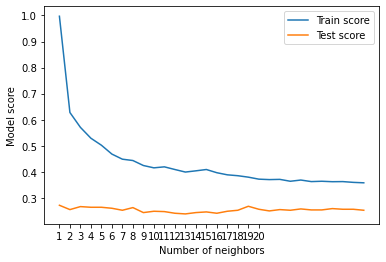

In [282]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")